## Extracting data

This project will aim on extracting and analyzing Twitter data about Data Science to better understand the relevant topics discussed on the microblogging website. 

In [4]:
#Importing packages
from twitterscraper import query_tweets
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import matplotlib
from nltk.corpus import stopwords, wordnet
import nltk
from textblob import Word
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [5]:
#Setting plot parameters
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We will extract all tweets mentioning 'Data Science' within a span of a day, specifically from 3rd January, 2020 to 4th January, 2020.

In [6]:
#Extracting twitter data
list_of_tweets = query_tweets('Data Science', 
         begindate=datetime.date(2020, 1, 3), 
         enddate=datetime.date(2020, 1, 4), 
         lang='en')
#Converting list of tweets to DataFrame
tweets_df = pd.DataFrame([vars(x) for x in list_of_tweets])

INFO: queries: ['Data Science since:2020-01-03 until:2020-01-04']
INFO: Got 3084 tweets (3084 new).


In [7]:
#Looking at basic datatype info and dataframe structure
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 21 columns):
screen_name         3084 non-null object
username            3084 non-null object
user_id             3084 non-null object
tweet_id            3084 non-null object
tweet_url           3084 non-null object
timestamp           3084 non-null datetime64[ns]
timestamp_epochs    3084 non-null int64
text                3084 non-null object
text_html           3084 non-null object
links               3084 non-null object
hashtags            3084 non-null object
has_media           3084 non-null bool
img_urls            3084 non-null object
video_url           3084 non-null object
likes               3084 non-null int64
retweets            3084 non-null int64
replies             3084 non-null int64
is_replied          3084 non-null bool
is_reply_to         3084 non-null bool
parent_tweet_id     3084 non-null object
reply_to_users      3084 non-null object
dtypes: bool(3), datetime64[ns](1)

In [8]:
#Looking at the first few rows of the dataframe
tweets_df.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,Datascience__,Data science,815169124322201600,1213248385391759361,/Datascience__/status/1213248385391759361,2020-01-03 23:58:50,1578095930,"Practical Deep Learning for Coders, v3 | http:...","<p class=""TweetTextSize js-tweet-text tweet-te...","[http://fast.ai, https://course.fast.ai/]",...,False,[],,0,0,0,False,False,,[]
1,Datascience__,Data science,815169124322201600,1213248384301182976,/Datascience__/status/1213248384301182976,2020-01-03 23:58:50,1578095930,Artificial intelligence is writing Beethoven's...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://www.euronews.com/2019/12/14/artificia...,...,False,[],,1,0,0,False,False,,[]
2,Datascience__,Data science,815169124322201600,1213248383265234945,/Datascience__/status/1213248383265234945,2020-01-03 23:58:50,1578095930,Machine Learning Lecture https://argmax.ai/ml-...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://argmax.ai/ml-course/],...,False,[],,0,0,0,False,False,,[]
3,digitalked,Edwin Munene CEO @digitalked,3259000821,1213248109045829638,/digitalked/status/1213248109045829638,2020-01-03 23:57:44,1578095864,Learn #Datascience in python \n#socialmedia #d...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,[https://pbs.twimg.com/media/ENZSt1MUcAAiMsC.jpg],,2,2,0,False,False,,[]
4,DarkstarIE,Darkstar IE,219786410,1213248066813386752,/DarkstarIE/status/1213248066813386752,2020-01-03 23:57:34,1578095854,"Because we need balance, and challenge. We nee...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,0,0,2,True,True,1213162455741976578,"[{'screen_name': 'jTooShygrimsley', 'user_id':..."


## Exploratory Data Analysis 

First let us look at the traffic generated by the keyword 'Data Science' over a day.

c:\users\sbsha\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


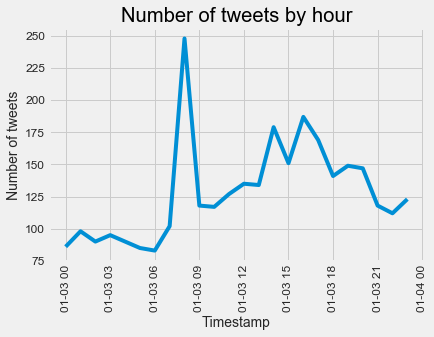

In [9]:
#Calculating number of tweets by hour
count_by_hr = tweets_df.groupby(pd.Grouper(key='timestamp', freq="1H")).count()
#Plotting time series graph for tweets
plt.plot(count_by_hr['tweet_id'])
plt.xlabel('Timestamp')
plt.ylabel('Number of tweets')
plt.xticks(rotation=90)
plt.title('Number of tweets by hour')
plt.show()

Thus we can see that activity relevant to the topic increased as the day passed with maximum acivity being generated between 6AM PDT and 9AM PDT.

In [10]:
#Looking at the summary of 'has_media' variable
tweets_df['has_media'].describe()

count      3084
unique        2
top       False
freq       2391
Name: has_media, dtype: object

In [11]:
#Looking at the summary of 'is_replied' variable
tweets_df['is_replied'].describe()

count      3084
unique        2
top       False
freq       2702
Name: is_replied, dtype: object

In [12]:
#Looking at the summary of 'is_reply_to' variable
tweets_df['is_reply_to'].describe()

count      3084
unique        2
top       False
freq       2644
Name: is_reply_to, dtype: object

We can see that most of these tweets don't have media files attached to them, have not been replied to and are standalone tweets (as opposed to a reply to some tweet).

## Text Pre-processing 

For the purpose of topic modeling, we're only concerned with the text data. This text data needs to be cleaned to fit our model.

In [13]:
#Taking only the text field of the dataset
tweets = pd.DataFrame(tweets_df['text'])
tweets

,text
0,"Practical Deep Learning for Coders, v3 | http:..."
1,Artificial intelligence is writing Beethoven's...
2,Machine Learning Lecture https://argmax.ai/ml-...
3,Learn #Datascience in python \n#socialmedia #d...
4,"Because we need balance, and challenge. We nee..."
...,...
3079,Great Articles On Data Science\n#rstats #pydat...
3080,Top 8 #DataScience Use Cases in #Marketing #KD...
3081,Cummings adopted the strategy of being a guru ...
3082,"""There are three kinds of lies: lies, damned l..."


In [14]:
#Converting text to lower case
tweets['text'] = tweets['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Removing punctuation
tweets['text'] = tweets['text'].str.replace('[^\w\s]','')
#Removing stopwords
stop = stopwords.words('english')
tweets['text'] = tweets['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Lemmatizing the text
tweets['text'] = tweets['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tweets

,text
0,practical deep learning coder v3 httpfastai co...
1,artificial intelligence writing beethoven unfi...
2,machine learning lecture httpsargmaxaimlcourse...
3,learn datascience python socialmedia digitalma...
4,need balance challenge need healthy skepticism...
...,...
3079,great article data science rstats pydata datas...
3080,top 8 datascience use case marketing kdnhttpow...
3081,cummings adopted strategy guru promising magic...
3082,three kind lie lie damned lie statistic disrae...


## Wordcloud 

Let us now analyze the text data by generating a wordcloud.

(-0.5, 799.5, 399.5, -0.5)

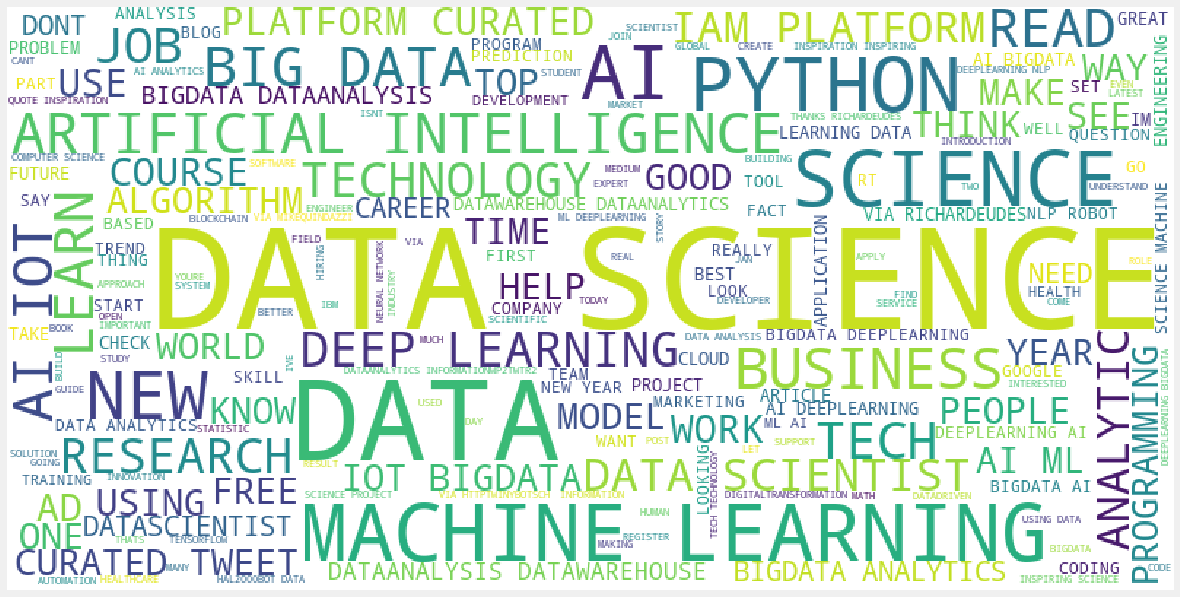

In [15]:
#Setting wordcloud stopwords
stopwords = set(STOPWORDS)
stopwords.add("datascience")
stopwords.add("machinelearning")
stopwords.add("artificialintelligence")
#Plotting the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white",stopwords=stopwords).generate(" ".join([i for i in tweets['text'].str.upper()]))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")

## Topic Modeling using LDA

Let us now first calculate the count for all words used in the dataset and identify the top 10 words.

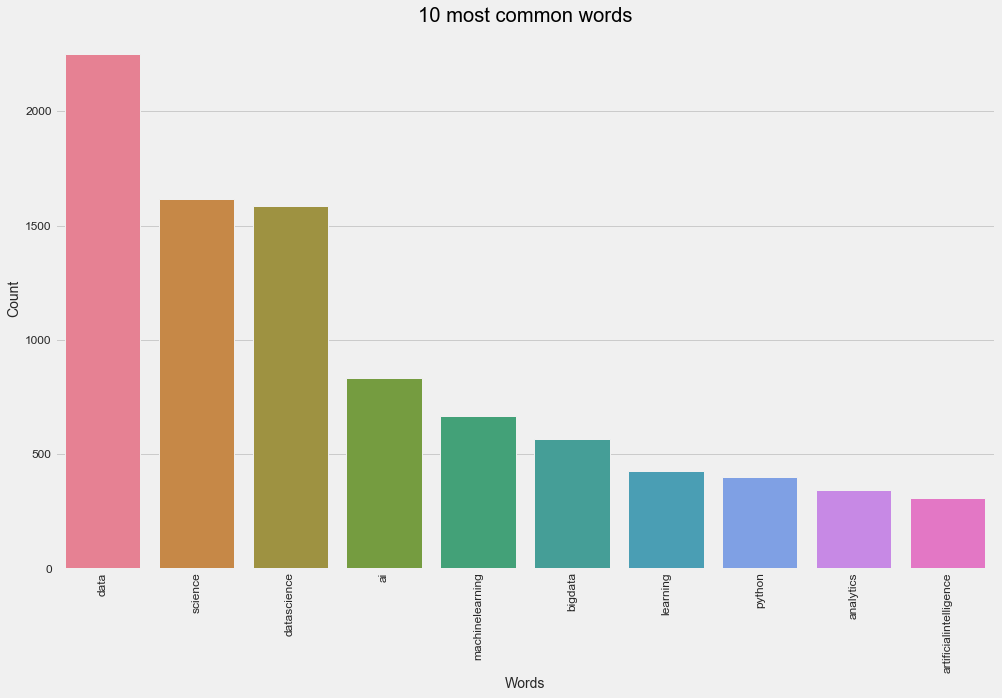

In [16]:
#Initializing the count vectorizer 
count_vectorizer = CountVectorizer(stop_words='english')
# Fitting and transform the text
count_data = count_vectorizer.fit_transform(tweets['text'])
words = count_vectorizer.get_feature_names()
total_counts = np.zeros(len(words))
for t in count_data:
    total_counts+=t.toarray()[0]
count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words)) 
#Plotting top 10 words
plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='10 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

We will now use the Latent Dirichlet Allocation (LDA) model to identify topics using the word count vectorizer.

In [17]:
#Setting the LDA parameters
number_topics = 10
number_words = 5
#Fitting the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
#Printing the topics found by the LDA model
print("Topics found via LDA:")
words = count_vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("\nTopic #%d:" % topic_idx)
    print(" ".join([words[i]
                    for i in topic.argsort()[:-number_words - 1:-1]]))


Topics found via LDA:

Topic #0:
data science datascience 2020 cloud

Topic #1:
data science ai datascience new

Topic #2:
data science datascience bigdata analytics

Topic #3:
data science datascience learning machinelearning

Topic #4:
datascience science data ai machinelearning

Topic #5:
datascience data science ai learning

Topic #6:
datascience ai machinelearning deeplearning artificialintelligence

Topic #7:
data science datascience good job

Topic #8:
datascience python data science bigdata

Topic #9:
datascience ai data mikequindazzi bigdata


In this way, topic modeling can be used to highlight key topics from text data.